In [1018]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# **Ouverture du csv, un peu long car volumineux**

In [1019]:
df=pd.read_csv('airbnb.csv',";")

Le dataframe est immense et nous n'allons pas tout utiliser, nous supprimons toutes les colonnes qui ne sont pas utiles à notre recherche. Nous pourrons toujours venir les rechercher si nous en avons le besoin


In [1020]:
#Premiere supression de variables pas utiles à notre analyse
df=df.drop(['Listing Url','Scrape ID','Last Scraped','Host Acceptance Rate','Scrape ID','Last Scraped',
            'Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL','Host Acceptance Rate',
           'Host Thumbnail Url','Host Picture Url','Host Verifications','Neighbourhood','Neighbourhood Group Cleansed',
           'Geolocation','Has Availability','Calendar last Scraped','License','Jurisdiction Names'], axis=1)

In [1021]:
#deuxieme supression de variables pas utiles à notre analyse
df=df.drop(['Summary','Space','Experiences Offered','Notes','Access','State','Zipcode','Host Name','Host Location','Host Neighbourhood', 'Host ID',
           'Host Listings Count','Smart Location','Country Code','Square Feet','Security Deposit','Calendar Updated',
            'Guests Included','Extra People','Street','Country','Cancellation Policy','Calculated host listings count','Features','Market'], axis=1)

In [1022]:
#On rename les colonnes qui ont des espaces
df.rename(columns={'ID':"id",'Name': 'name', 'Description': 'description', 'Host About': 'host_about', 'Host Response Time': 'host_response_time', 'Host Response Rate': 'host_response_rate', 'Host Total Listings Count': 'host_total_listing_count', 'Neighbourhood Cleansed': 'neighbourhood_cleansed' , 'City': 'city', 'Property Type': 'property_type', 'Room Type': 'room_type', 'Accommodates': 'accommodates'
, 'Bathrooms': 'bathrooms', 'Bedrooms': 'bedrooms', 'Beds': 'beds', 'Bed Type': 'bed_type', 'Amenities': 'amenities', 'Price': 'price', 'Weekly Price': 'weekly_price', 'Monthly Price': 'monthly_price', 'Cleaning Fee': 'cleaning_fee', 'Minimum Nights': 'minimum_nights', 'Maximum Nights': 'maximum_nights', 'Availability 30': 'availability_30', 'Availability 60': 'availability_60', 'Availability 90': 'availability_90', 'Availability 365': 'availability_365', 'Number of Reviews': 'number_of_reviews', 'First Review': 'first_review'
, 'Last Review': 'last_review', 'Review Scores Rating': 'review_scores_rating', 'Review Scores Accuracy': 'review_scores_accuracy', 'Review Scores Cleanliness': 'review_scores_cleanliness', 'Review Scores Checkin': 'review_scores_checkin', 'Review Scores Communication': 'review_scores_communication', 'Review Scores Location': 'review_scores_location', 'Review Scores Value': 'review_scores_value', 'Reviews per Month': 'reviews_per_month', 'Longitude': 'longitude','Latitude': 'latitude',"Neighborhood Overview":"neighborhood_overview","Transit":"transit","Interaction":"interaction","House Rules":"house_rules","Host Since":"host_since"}, inplace=True)

In [1023]:
# on met la colonne id en index

df=df.set_index("id")

In [1024]:
#Nous allons nous concentrer sur les villes de Paris et Londres, avant de commencer le nettoyage nous allons garder uniquement toutes les données concernant ces deux villes

#on divise le df par villes puis on les regroupe dans df
df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']
df = df_paris.append(df_london)

In [1025]:
#On verifie qu'il reste bien uniquement Paris et Londre
print(df['city'].unique())

['Paris' 'London']


# **Analyse du dataframe**

In [1026]:
#informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101936 entries, 7735531 to 14561490
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name                         101932 non-null  object 
 1   description                  101922 non-null  object 
 2   neighborhood_overview        60460 non-null   object 
 3   transit                      64012 non-null   object 
 4   interaction                  52028 non-null   object 
 5   house_rules                  58563 non-null   object 
 6   host_since                   101917 non-null  object 
 7   host_about                   58891 non-null   object 
 8   host_response_time           72188 non-null   object 
 9   host_response_rate           72188 non-null   float64
 10  host_total_listing_count     101917 non-null  float64
 11  neighbourhood_cleansed       101936 non-null  object 
 12  city                         101936 non-null  object 
 

In [1027]:
#Somme des Nans par colonne
df.isna().sum()

name                               4
description                       14
neighborhood_overview          41476
transit                        37924
interaction                    49908
house_rules                    43373
host_since                        19
host_about                     43045
host_response_time             29748
host_response_rate             29748
host_total_listing_count          19
neighbourhood_cleansed             0
city                               0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        371
bedrooms                         220
beds                             207
bed_type                           0
amenities                        944
price                            107
weekly_price                   77187
monthly_price                  82500
cleaning_fee                   37986
m

In [1028]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
print(df.isna().sum())


 Données manquantes par colonne :

name                               4
description                       14
neighborhood_overview          41476
transit                        37924
interaction                    49908
house_rules                    43373
host_since                        19
host_about                     43045
host_response_time             29748
host_response_rate             29748
host_total_listing_count          19
neighbourhood_cleansed             0
city                               0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        371
bedrooms                         220
beds                             207
bed_type                           0
amenities                        944
price                            107
weekly_price                   77187
monthly_price                  82500
cl

In [1029]:
#Verification des doublons
df.duplicated().sum()

0

In [1030]:
#Nombre de valeur unique par colonne
df.nunique()

name                            98320
description                    100242
neighborhood_overview           55331
transit                         59619
interaction                     44384
house_rules                     49835
host_since                       2680
host_about                      41051
host_response_time                  4
host_response_rate                 89
host_total_listing_count           93
neighbourhood_cleansed             53
city                                2
latitude                       101936
longitude                      101936
property_type                      30
room_type                           3
accommodates                       16
bathrooms                          17
bedrooms                           11
beds                               17
bed_type                            5
amenities                       76604
price                             626
weekly_price                      743
monthly_price                    1771
cleaning_fee

In [1031]:
#description
df.describe()

,host_response_rate,host_total_listing_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,72188.000000,101917.000000,101936.000000,101936.000000,101936.000000,101565.000000,101716.000000,101729.000000,101829.000000,24749.000000,...,101936.000000,101936.000000,72587.000000,72383.000000,72439.000000,72312.000000,72431.000000,72337.000000,72317.000000,74087.000000
mean,92.151189,10.750542,50.096122,1.197706,3.052631,1.173844,1.195741,1.694325,95.556305,487.487454,...,147.797903,13.852417,91.757326,9.453850,9.181863,9.630200,9.667960,9.444060,9.230845,1.239842
std,19.620885,63.305763,1.321461,1.231203,1.694476,0.472979,0.831889,1.110724,77.309871,202.250135,...,141.943321,28.143270,9.190901,0.911229,1.136724,0.787641,0.773441,0.831827,0.953944,1.424954
min,0.000000,0.000000,48.814903,-0.479218,1.000000,0.000000,0.000000,0.000000,0.000000,27.000000,...,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,96.000000,1.000000,48.862998,-0.112300,2.000000,1.000000,1.000000,1.000000,50.000000,325.000000,...,0.000000,0.000000,89.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,0.280000
50%,100.000000,1.000000,48.890707,2.288539,2.000000,1.000000,1.000000,1.000000,75.000000,450.000000,...,90.000000,3.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.710000
75%,100.000000,2.000000,51.512883,2.350013,4.000000,1.000000,1.000000,2.000000,110.000000,607.000000,...,301.000000,14.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.670000
max,100.000000,735.000000,51.654377,2.458650,16.000000,8.000000,10.000000,16.000000,999.000000,999.000000,...,365.000000,488.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


# **Démarrons maintenant le nettoyage**

In [1032]:
#On supprime les lignes dont les reviews ne sont pas renseignés étant donnée que c'est un point important de notre analyse
df=df.dropna(axis=0,subset=["first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"])

In [1033]:
#Maintenant que toutes les données ont une note attribuée, nous allons affiner en retirant les lignes qui ont des nans et qui peuvent fausser notre analyse.
df=df.dropna(axis=0,subset=["description","name","host_since","host_total_listing_count","price"]) 

In [1034]:
#On supprime ces deux variables qui présentent trop de données manquantes pour être exploitées et qui sont difficiles à remplacer sans impacter les résultats de l'analyse
#df=df.drop(['host_response_time','host_response_rate'], axis=1)

In [1035]:
# on remplace les nans des colonnes non renseigné volontairement par "nr", et "0" pour les colonnes numériques 'weekly_price','montly_price' et 'cleaning_fee'
# De plus, on remplace par 0 les Nans de 'bathrooms','bedrooms' et 'bed' que l'on conciderera par non renseigné par la suite

# afin de tout de même prendre en compte cette donnée et de ne pas fausser les analyses futures
# En effet, il y a énormément d'annonces dont ces colonnes ne sont pas remplies donc on ne peut pas simplement les supprimer

#je souhaitais garder les variables numerique et objet comme elles etaient, d'où le 'nr pour objet et 0 pour numerique (je n'ai pas trouvé par quoi d'autre que 0 totu en gardant la variable en numerique)

df["neighborhood_overview"]=df["neighborhood_overview"].fillna("nr")
df["transit"]=df["transit"].fillna("nr")
df["interaction"]=df["interaction"].fillna("nr")
df["house_rules"]=df["house_rules"].fillna("nr")
df["host_about"]=df["host_about"].fillna("nr")
df["amenities"]=df["amenities"].fillna("nr")
df["bathrooms"]=df["bathrooms"].fillna(0)
df["bedrooms"]=df["bedrooms"].fillna(0)
df["beds"]=df["beds"].fillna(0)
df["weekly_price"]=df["weekly_price"].fillna(0)
df["monthly_price"]=df["monthly_price"].fillna(0)
df["cleaning_fee"]=df["cleaning_fee"].fillna(0)

#Si on change d'avis concernant ces deux variables
# Et nous remplaçons les Nan de 'host_response_rate' par la moyenne, car 0 aurait un trop grand impact et 'nr' transformera la variable en 'objet'
df["host_response_rate"]=df["host_response_rate"].fillna(df["host_response_rate"].mean())
df["host_response_time"]=df["host_response_time"].fillna("nr")

In [1036]:
#On vérifie si il reste des Nans.
print('\n Données manquantes par colonne :\n')
print(df.isna().sum())

#Non tout est bon, on peut passer à la suite


 Données manquantes par colonne :

name                           0
description                    0
neighborhood_overview          0
transit                        0
interaction                    0
house_rules                    0
host_since                     0
host_about                     0
host_response_time             0
host_response_rate             0
host_total_listing_count       0
neighbourhood_cleansed         0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
amenities                      0
price                          0
weekly_price                   0
monthly_price                  0
cleaning_fee                   0
minimum_nights                 0
maximum_nights                 0
availab

In [1037]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72103 entries, 7735531 to 9973188
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         72103 non-null  object 
 1   description                  72103 non-null  object 
 2   neighborhood_overview        72103 non-null  object 
 3   transit                      72103 non-null  object 
 4   interaction                  72103 non-null  object 
 5   house_rules                  72103 non-null  object 
 6   host_since                   72103 non-null  object 
 7   host_about                   72103 non-null  object 
 8   host_response_time           72103 non-null  object 
 9   host_response_rate           72103 non-null  float64
 10  host_total_listing_count     72103 non-null  float64
 11  neighbourhood_cleansed       72103 non-null  object 
 12  city                         72103 non-null  object 
 13  latitude     

In [1038]:
#On fait une sauvegarde du dataset nettoyé
#df.to_pickle("airbnbcleaned.csv")

# **Exploration des variables**

In [1039]:

#On stock les variables numérique dans num_df
num_df=df.select_dtypes(include="float64")

In [1040]:
#On affiche la moyenne de chaque variable numerique dans un df appelé stats
stats = pd.DataFrame(num_df.mean(), columns = ['moyenne'])
stats.round(2)

#On remarque un soucis dans la variable 'maximum_nights'
#Et potentiellement des erreurs dans le 'minimum_nights' qui devrait etre proche de 1

,moyenne
host_response_rate,93.47
host_total_listing_count,7.04
latitude,50.04
longitude,1.25
accommodates,3.09
bathrooms,1.16
bedrooms,1.17
beds,1.70
price,93.22
weekly_price,137.39




 Il semble y avoir des valeurs abérrantes dans maximum_nights pour avoir des valeurs si élevées

 Nous allons donc regarder cette variable ainsi que minimum_nights

In [1041]:
#On recherche le bien avec la valeur la plus élevé pour maximum_nights
num_df['maximum_nights'].idxmax(axis = 0)

642950

In [1042]:
#On affiche le logement qui a la valeur la plus élevée pour maximum_nights
print(df.loc[642950])
#Nous constatons une valeur abérrante

name                                         Studio + Garden + BBQ in Montmartre
description                    Cosy Studio in the heart of the 18th down the ...
neighborhood_overview          I will give you a list of cafés, bars and rest...
transit                                                                       nr
interaction                    I Will be In touch through text message, tel o...
house_rules                                                                   nr
host_since                                                            2012-08-09
host_about                     I lived in San Francisco for 6 years. Back in ...
host_response_time                                                within an hour
host_response_rate                                                            95
host_total_listing_count                                                       3
neighbourhood_cleansed                                         Buttes-Montmartre
city                        

In [1043]:
#On affiche un autre bien qui contient des valeur abérrantes
print(df.loc[9112784])   #valeur aberrante minimum night 3888 et maximum night 9999

name                                    APARTMENT FOR 4 PEOPLE IN CENTRAL LONDON
description                    The apartment is situated in a very central lo...
neighborhood_overview          You are in the middle of it all with all the f...
transit                        Barbican Tube Station - 8 minutes walk Farring...
interaction                    I am available via e-mail and (SENSITIVE CONTE...
house_rules                    No smoking, no drugs, and no pets allowed. It ...
host_since                                                            2013-07-22
host_about                     Am a globetrotter - lived and worked all aroun...
host_response_time                                                within an hour
host_response_rate                                                           100
host_total_listing_count                                                       1
neighbourhood_cleansed                                                 Islington
city                        

In [1044]:
#print(df.loc[10192308 ])

In [1045]:
#print(df.sort_values(by = 'maximum_nights').tail(40))

In [1046]:
#print(df.sort_values(by = 'minimum_nights').tail(40))

A peu près 30 annonces ont une valeur abérrante pour la variable 'minimum_nights'

A peu près 80 annonces ont une valeur abérrante pour la variable 'maximum_nights'

In [1047]:
#On change les valeur aberrante (qui depasse 365jours) de maximum_nights en valeur de la variable 'availability_365', qui semble plus logique
num_df['maximum_nights'] = np.where(num_df['maximum_nights'] > 365, num_df['availability_365'], num_df['maximum_nights'])


In [1048]:
#On verifie quel est le logement avec le plus grand nombre de maximum_nights
num_df['maximum_nights'].idxmax(axis = 0)

1372747

In [1049]:
#On utilise cet index pour repérer le logement
print(df.loc[1372747])
#On constate qu'il a 365 donc plus de valeur aberrante dans cette variable

name                                                      Charming Studio Marais
description                    APARTMENT INFORMATION This charming and comfor...
neighborhood_overview                                                         nr
transit                                                                       nr
interaction                                                                   nr
house_rules                                              Minimum stays of 1 week
host_since                                                            2013-07-12
host_about                                                                    nr
host_response_time                                            within a few hours
host_response_rate                                                            80
host_total_listing_count                                                       8
neighbourhood_cleansed                                            Hôtel-de-Ville
city                        

In [1050]:
#On modifie les valeurs abérrantes de minimum_nights en remplaçant toutes les valeurs au dessus de 31 jours par 1
num_df.minimum_nights[num_df.minimum_nights > 31] = 1


In [1051]:
#On verifie quel est le plus grand nombre de minimum_nights
num_df['maximum_nights'].idxmax(axis = 0)

1372747

In [1052]:
#On affiche le logement avec l'index qui le plus grand nombre de minimum_night
print(df.loc[1372747])

#on ne remarque plus de valeur aberrante mais on remarque que ce logement a ausi le nombre de maximum_night maximum
#cet utilisateur loue donc pour des longues durées
# il a par ailleurs fait une erreur soit dans house_rules soit dans minimum_night car le nombre de nuitées minimum entrées ne correspond pas aux house_rules

name                                                      Charming Studio Marais
description                    APARTMENT INFORMATION This charming and comfor...
neighborhood_overview                                                         nr
transit                                                                       nr
interaction                                                                   nr
house_rules                                              Minimum stays of 1 week
host_since                                                            2013-07-12
host_about                                                                    nr
host_response_time                                            within a few hours
host_response_rate                                                            80
host_total_listing_count                                                       8
neighbourhood_cleansed                                            Hôtel-de-Ville
city                        

In [1053]:
#On refait la moyenne de chaque variable numerique dans un df appelé stats
stats2 = pd.DataFrame(num_df.mean(), columns = ['moyenne'])
stats2.round(2)

,moyenne
host_response_rate,93.47
host_total_listing_count,7.04
latitude,50.04
longitude,1.25
accommodates,3.09
bathrooms,1.16
bedrooms,1.17
beds,1.70
price,93.22
weekly_price,137.39


In [1054]:
#On fait la mediane
stats2['median'] = num_df.median()
stats2

,moyenne,median
host_response_rate,93.466603,100.000000
host_total_listing_count,7.042647,1.000000
latitude,50.042177,48.887775
longitude,1.247832,2.296717
accommodates,3.091078,2.000000
bathrooms,1.157691,1.000000
bedrooms,1.173904,1.000000
beds,1.703452,1.000000
price,93.215664,75.000000
weekly_price,137.394034,0.000000


In [1055]:
#On crée une variable mean_med_diff correspondant à la valeur absolue de la différence entre moyenne et médiane.
stats2['mean_med_diff'] = abs(stats2['moyenne'] - stats2['median'])
stats2.round(2)

,moyenne,median,mean_med_diff
host_response_rate,93.47,100.00,6.53
host_total_listing_count,7.04,1.00,6.04
latitude,50.04,48.89,1.15
longitude,1.25,2.30,1.05
accommodates,3.09,2.00,1.09
bathrooms,1.16,1.00,0.16
bedrooms,1.17,1.00,0.17
beds,1.70,1.00,0.70
price,93.22,75.00,18.22
weekly_price,137.39,0.00,137.39


In [1056]:
#On ajoute les 3 colonnes qui correponde aux 3 quantiles de chaques variables numérique
stats2[['q1', 'q2', 'q3']] = num_df.quantile(q = [0.25,0.5,0.75]).transpose()

In [1057]:
#On peut compléter notre analyse en s'intéressant au min, max de chaque variable. 
#La différence des deux nous donnera une idée de l'étendue sur laquelle se répartissent les valeurs.
stats2['min'] = num_df.min()
stats2['max'] = num_df.max()
stats2['min_max_diff'] = stats2['max'] - stats2['min']
stats2

,moyenne,median,mean_med_diff,q1,q2,q3,min,max,min_max_diff
host_response_rate,93.466603,100.000000,6.533397,93.466603,100.000000,100.000000,0.000000,100.000000,100.000000
host_total_listing_count,7.042647,1.000000,6.042647,1.000000,1.000000,2.000000,0.000000,735.000000,735.000000
latitude,50.042177,48.887775,1.154402,48.861769,48.887775,51.511102,48.816590,51.653192,2.836602
longitude,1.247832,2.296717,1.048885,-0.108708,2.296717,2.351539,-0.479218,2.421537,2.900755
accommodates,3.091078,2.000000,1.091078,2.000000,2.000000,4.000000,1.000000,16.000000,15.000000
bathrooms,1.157691,1.000000,0.157691,1.000000,1.000000,1.000000,0.000000,8.000000,8.000000
bedrooms,1.173904,1.000000,0.173904,1.000000,1.000000,1.000000,0.000000,10.000000,10.000000
beds,1.703452,1.000000,0.703452,1.000000,1.000000,2.000000,0.000000,16.000000,16.000000
price,93.215664,75.000000,18.215664,50.000000,75.000000,110.000000,8.000000,999.000000,991.000000
weekly_price,137.394034,0.000000,137.394034,0.000000,0.000000,250.000000,0.000000,999.000000,999.000000


On remarque que la médiane et la moyenne de la variable cible "review_scores_rating" sont très proche.

Il en est quasiment de même pour toutes les variables scores.

Ces variable sont donc hétérogènes.

Les variables les moins hétérogènes sont beds, host_total_listing_counts, host_response_rate, price, weekly_price, monthly_price et maximum_nights.

Pour la variable beds, on peut estimer que la moyenne se rapproche de 2 lits car il nous faut seulement des nombres entiers (un lit ne se divise pas).

Les résultats nous montrent que la moyenne est influencée par les valeurs extrêmes. Bien que la moyenne du nombre de lits par logement est de 2, il y a plus de logements avec un seul lit.

La différence entre la moyenne et la médiane de host_total_listing_count est très importante.

On en déduit que la moyenne est très impactée par les valeurs extrêmes et donc les propriétaires qui ont un usage commercial de Airbnb et mettent en lignes de nombreuses annnonces.

La valeur de la médiane, 1, nous informe que la grande majorité des propriétaires ne mettent qu'un logement en location.

La différence entre la moyenne et la médiane de la variable prix est assez importante. Le prix médian est bien inférieur au prix médian.

Les valeurs de weekly_price et monthly_price nous laisse supposer que peu de personne propose de prix à la semaine ou au mois.

In [1058]:
# tests de dépendance entre variables numériques:

#import pearsonr from scipy.stats
from scipy.stats.stats import pearsonr
#teste de correlation entre le nombre de review et la note globale d'une annonce
pd.DataFrame(pearsonr(df["number_of_reviews"],df["review_scores_rating"]),index=["pearson_coeff","p-value"],columns=["résultat_test"])
#la p-value > 5%, le coefficient proche de 0, il n'y a pas de corrélation entre les deux variables.

,résultat_test
pearson_coeff,0.003492
p-value,0.348390


# **Analyse des variables catégorielles**

In [1059]:
#On determine les variables catégorielles et on les stock dans cat_df
cat_df = df.select_dtypes(include=['O'])

In [1060]:
#On affiche les variables categorielles
cat_df.head()

#host_since, first_review er last_review, n'ont rien a faire ici donc elles seront donc transformées en variables 'date time'

,name,description,neighborhood_overview,transit,interaction,house_rules,host_since,host_about,host_response_time,neighbourhood_cleansed,city,property_type,room_type,bed_type,amenities,first_review,last_review
id,,,,,,,,,,,,,,,,,
7735531,Petit cocon au coeur de Paris,"Bienvenue chez moi, j'habite en plein centre d...","Mon quartier ""Le Marais"" est unique à Paris. A...",Mon appartement est à seulement quelques mètre...,Je serais entièrement disponible pour répondre...,De la propreté et du respect ! Prenez svp vos ...,2015-06-11,"Bonjour, je travaille dans l'hôtellerie depuis...",within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"Wireless Internet,Kitchen,Elevator in building...",2015-09-06,2017-04-02
3036231,Enjoy the lovely heart of Paris !,Beautiful and lightful 58 m2 apartment close t...,Le Marais est un quartier incroyable pour se b...,"Proche Ligne 1 (Saint-Paul, Bastille) et 8 (Ch...",nr,nr,2013-05-19,"Bonjour tout le monde,\r\n\r\nJe me prénomme P...",within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Heating,...",2014-07-16,2017-02-26
2183529,Studio Saint Paul,Colourful and bright studio for 2 guests in a ...,"Located on a great and quiet neighbourhood, wi...",The closest subway station is Saint Paul on li...,After confirming the booking I send you a welc...,No Pets. No Smoking. No Parties.,2013-12-11,I am an architect with a passion for photograp...,within a few hours,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2014-06-09,2017-02-07
515970,160 M2 Place des Vosges .Marais.,Welcome to this beautiful apartment which is l...,"The apartment is in the center of Paris , in t...","The subway is at one minute , walking distance.",I can help you all the time during your stay,This is a protected historical building which ...,2012-05-27,I am french and I am a painter. I'm in my for...,within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2012-08-13,2017-01-03
3144316,Heart Marais-22m2 Lovely Studio,Located in the heart of Marais District (Rue d...,-A Large variety of restaurants (rue des rosie...,The nearest tube stations are Saint Paul line ...,nr,nr,2014-05-20,"Hi my name is Lea, I was born in Paris have li...",within a few hours,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2014-06-08,2017-03-16


In [1061]:
#On regarde la fréquence des modalités de la variable property_type
cat_df['property_type'].value_counts(normalize = True)

Apartment             0.866746
House                 0.095960
Bed & Breakfast       0.011872
Loft                  0.008807
Townhouse             0.003786
Other                 0.003523
Condominium           0.002399
Dorm                  0.001720
Guesthouse            0.001207
Boat                  0.000929
Boutique hotel        0.000832
Serviced apartment    0.000652
Hostel                0.000499
Cabin                 0.000444
Bungalow              0.000153
Villa                 0.000139
Camper/RV             0.000083
Chalet                0.000042
Yurt                  0.000028
Earth House           0.000028
Castle                0.000028
Tipi                  0.000014
Ryokan (Japan)        0.000014
Cave                  0.000014
Hut                   0.000014
Tent                  0.000014
Treehouse             0.000014
Timeshare             0.000014
Igloo                 0.000014
Parking Space         0.000014
Name: property_type, dtype: float64

In [1062]:
#Nous allons garder uniquement les types de propriété 'Apartment' et 'House' qui représente 99,6% du dataset
cat_df['property_type']=cat_df['property_type'].loc[cat_df['property_type'].isin(['Apartment','House'])]

#On supprime les ligne qui ne sont pas des appartement ou maison (devenu Nans avec le code précédent) 
cat_df=cat_df.dropna(axis=0,subset=['property_type'])

In [1063]:
#On regarde la fréquence des modalités de la variable room_type
cat_df['room_type'].value_counts(normalize = True)

Entire home/apt    0.736249
Private room       0.255957
Shared room        0.007794
Name: room_type, dtype: float64

In [1064]:
#Nous allons garder uniquement les types de chambre 'Entire home/apt' et 'Private room' qui représente 99,9% du dataset
cat_df['room_type']=cat_df['room_type'].loc[cat_df['room_type'].isin(['Entire home/apt','Private room'])]

#On supprime les ligne qui ne sont pas des 'Entire home/apt' ou 'Private room' (devenu Nans avec le code précédent) 
cat_df=cat_df.dropna(axis=0,subset=['room_type'])

In [1065]:
#on regarde la fréquence des modalites de la variable city
cat_df['city'].value_counts(normalize = True)

Paris     0.557679
London    0.442321
Name: city, dtype: float64

beaucoup de variables catégorielles sont remplies librement par les propriétaires et donc quasiment toutes différentes.
Il conviendra donc de faire du text mining pour les analyser ultérieurement. 

In [1066]:
#On ré-assemble le dataframe variable numerique + variable catégorielles
df=pd.concat([num_df,cat_df],axis=1)

In [1067]:
# Mettons maintenant ces variables au format datetime

df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [1068]:
#Maintenant le que le df est reconstitué, on supprime les lignes qui contiennent des Nans du fait des changements dans cat_df
df=df.dropna(axis=0)


In [1069]:
#On affiche un df.info
df.info()
#Tout semble en ordre pour passer à la visualisation

<class 'pandas.core.frame.DataFrame'>
Index: 68873 entries, 7735531 to 9973188
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   host_response_rate           68873 non-null  float64       
 1   host_total_listing_count     68873 non-null  float64       
 2   latitude                     68873 non-null  float64       
 3   longitude                    68873 non-null  float64       
 4   accommodates                 68873 non-null  float64       
 5   bathrooms                    68873 non-null  float64       
 6   bedrooms                     68873 non-null  float64       
 7   beds                         68873 non-null  float64       
 8   price                        68873 non-null  float64       
 9   weekly_price                 68873 non-null  float64       
 10  monthly_price                68873 non-null  float64       
 11  cleaning_fee                 68873 non

In [1070]:
#on divise le df par villes puis on les regroupe dans df pour ecraser les données précédentes de df_london et df_paris
df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']
#On supprimme la première ligne de df_london car elle pose problème pour la visualisation par la suite et elle contient beaucoup de valeurs "Non-renseignées"
df_london.drop( df_london.index[0], inplace=True)
df = df_paris.append(df_london)

In [1071]:
#On fait une sauvegarde du dataset nettoyé
#df.to_pickle("airbnbcleaned.csv")

#Ouverture avec le code suivant
#df = pd.read_pickle('airbnbcleaned.csv')

# On convertit des variables catégorielles en variables INDICATRICES pour les inclurent dans notre modèle

In [1072]:
df2 = df
df2.head()

,host_response_rate,host_total_listing_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,host_about,host_response_time,neighbourhood_cleansed,city,property_type,room_type,bed_type,amenities,first_review,last_review
7735531,100.0,1.0,48.858654,2.353462,2.0,1.0,0.0,1.0,90.0,0.0,...,"Bonjour, je travaille dans l'hôtellerie depuis...",within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"Wireless Internet,Kitchen,Elevator in building...",2015-09-06,2017-04-02
3036231,100.0,2.0,48.855628,2.365637,6.0,1.0,2.0,2.0,140.0,0.0,...,"Bonjour tout le monde,\r\n\r\nJe me prénomme P...",within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Heating,...",2014-07-16,2017-02-26
2183529,99.0,37.0,48.855027,2.365122,2.0,1.0,0.0,1.0,80.0,600.0,...,I am an architect with a passion for photograp...,within a few hours,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2014-06-09,2017-02-07
515970,100.0,1.0,48.854519,2.365711,7.0,2.0,5.0,5.0,690.0,0.0,...,I am french and I am a painter. I'm in my for...,within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2012-08-13,2017-01-03
3144316,80.0,1.0,48.857004,2.358326,2.0,1.0,0.0,1.0,90.0,0.0,...,"Hi my name is Lea, I was born in Paris have li...",within a few hours,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2014-06-08,2017-03-16


In [1073]:
# Dichotomisation OHE de la variable host_response_time
print (df2['host_response_time'].value_counts())
df2 = df2.join(pd.get_dummies (data = df['host_response_time'], prefix = 'host_response_time'))


within an hour        26633
within a few hours    15013
nr                    13595
within a day          11985
a few days or more     1646
Name: host_response_time, dtype: int64


In [1074]:
# Dichotomisation de la variable neighbourhood_number 
print (df2['neighbourhood_cleansed'].value_counts())
df2 = df2.join(pd.get_dummies (data = df['neighbourhood_cleansed'], prefix = 'neighbourhood_cleansed'))


Buttes-Montmartre         4293
Popincourt                3849
Westminster               3642
Tower Hamlets             3423
Hackney                   2837
Vaugirard                 2749
Entrepôt                  2716
Camden                    2486
Batignolles-Monceau       2278
Kensington and Chelsea    2269
Islington                 2231
Southwark                 2159
Lambeth                   2017
Ménilmontant              1969
Temple                    1931
Buttes-Chaumont           1925
Passy                     1764
Hammersmith and Fulham    1711
Opéra                     1693
Hôtel-de-Ville            1575
Wandsworth                1548
Panthéon                  1533
Observatoire              1462
Reuilly                   1452
Luxembourg                1414
Bourse                    1318
Gobelins                  1298
Palais-Bourbon            1270
Élysée                    1020
Louvre                     900
Lewisham                   851
Haringey                   812
Brent   

In [1075]:
# Dichotomisation de la variable city
print (df2['city'].value_counts())
df2 = df2.join(pd.get_dummies (data = df['city'], prefix = 'city'))

Paris     38409
London    30463
Name: city, dtype: int64


In [1076]:
# Dichotomisation de la variable room_type
print (df2 ['room_type'].value_counts())
df2 = df2.join(pd.get_dummies (data = df['room_type'], prefix = 'room_type'))

Entire home/apt    51106
Private room       17766
Name: room_type, dtype: int64


In [1077]:
# Dichotomisation de la variable property_type
print(df2 ['property_type'].value_counts())
df2 = df2.join(pd.get_dummies (data = df['property_type'], prefix = 'property_type'))

Apartment    62010
House         6862
Name: property_type, dtype: int64


In [1078]:
# Dichotomisation de la variable bed_type
print(df2 ['bed_type'].value_counts())
df2 = df2.join(pd.get_dummies (data = df['bed_type'], prefix = 'bed_type'))

Real Bed         64103
Pull-out Sofa     3595
Couch              725
Futon              417
Airbed              32
Name: bed_type, dtype: int64


In [1079]:
#Création de la variable host_resp_time_number et remplacement par des nombres 0 à 4
#df['host_resp_time_number'] = df['host_response_time'] 
#df['host_resp_time_number'] = df['host_resp_time_number'].replace ( {'within an hour' : 4,
#                                                              'within a few hours' : 3,
#                                                              'nr' : 0,
#                                                              'within a day' : 2,
#                                                            'a few days or more' : 1})

In [1080]:
#Création de la variable neighbourhood_number 
#df['neighbourhood_number']= df['neighbourhood_cleansed']

In [1081]:
#On remplace les quartiers de Paris par des numéros de 1 à 20
#df.neighbourhood_number.replace(['Hôtel-de-Ville', 'Buttes-Montmartre', 'Buttes-Chaumont', 'Batignolles-Monceau', 'Opéra', 'Palais-Bourbon', 'Ménilmontant', 'Panthéon', 'Passy', 'Temple', 'Observatoire', 'Popincourt', 'Louvre', 'Luxembourg', 'Élysée', 'Reuilly', 'Vaugirard', 'Gobelins', 'Entrepôt', 'Bourse'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], inplace=True)

In [1082]:
#On remplace les quartiers de Paris par des numéros de 1 à 20
#df.neighbourhood_number.replace(['Lambeth', 'Waltham Forest', 'Barnet', 'Enfield', 'Redbridge', 'Greenwich', 'Lewisham', 'Merton', 'Wandsworth', 'Southwark', 'Hammersmith and Fulham', 'Kensington and Chelsea', 'City of London', 'Westminster', 'Camden', 'Islington', 'Hackney', 'Newham', 'Haringey', 'Richmond upon Thames', 'Hounslow', 'Ealing', 'Bromley', 'Tower Hamlets', 'Croydon', 'Brent', 'Hillingdon', 'Bexley', 'Barking and Dagenham', 'Harrow', 'Kingston upon Thames', 'Sutton', 'Havering'],[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133], inplace=True)

In [1083]:
#Création de la variable city_number
#df['city_number']= df['city']

In [1084]:
#On remplace les valeurs par des numéros
#df.city.replace(['Paris', 'London'],[0, 1], inplace=True)

In [1085]:
#Création de la variable room_type_number
#df['room_type_number']= df['room_type']

In [1086]:
#On remplace les valeurs par des numéros
#df.room_type_number.replace(['Entire home/apt', 'Private room'],[0, 1], inplace=True)

In [1087]:
#Création de la variable property_type_number
#df['property_type_number']= df['property_type']

In [1088]:
#On remplace les valeurs par des numéros
#df.property_type_number.replace(['Apartment', 'House'],[0, 1], inplace=True)

In [1089]:
#Création de la variable bed_type_number
#df['bed_type_number']= df['bed_type']

In [1090]:
#On remplace les valeurs par des numéros
#df.bed_type_number.replace(['Real Bed', 'Pull-out Sofa', 'Couch', 'Futon', 'Airbed'],[0, 1, 3, 4 ,5], inplace=True)

In [1091]:
#On crée une colonne review_months qui contient le nombre de mois entre first_review et last_review
df2['review_months'] = 12 * (df2.last_review.dt.year - df2.first_review.dt.year) + (df2.last_review.dt.month - df2.first_review.dt.month)

In [1092]:
#On verifie quel est la date max
df2['last_review'].idxmax(axis = 0)

'12582056'

In [1093]:
#On affiche la date de la dernière review que l'on concidèrera comme date du jour 2017-04-06
print(df2.loc['12582056'])

host_response_rate              100
host_total_listing_count          1
latitude                    48.8446
longitude                    2.3809
accommodates                      2
                             ...   
bed_type_Couch                    0
bed_type_Futon                    0
bed_type_Pull-out Sofa            0
bed_type_Real Bed                 1
review_months                     5
Name: 12582056, Length: 114, dtype: object


In [1094]:
df2['today'] = pd.Timestamp('20170406')

In [1095]:
#On crée une colonne host_since_months qui contient le nombre de mois entre sur airbnb
df2['host_since_months'] = 12 * (df2.today.dt.year - df2.host_since.dt.year) + (df2.today.dt.month - df2.host_since.dt.month)

In [1096]:
#On supprimme la colonne today qui n'a plus d'importance
del df2['today']

In [1097]:
#On stock les variables numérique dans num_pred pour le modele de prediction
num_pred=df2.select_dtypes('number')

In [1098]:
#num_pred=num_pred.drop(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'], axis=1)

In [1099]:
num_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68872 entries, 7735531 to 9973188
Data columns (total 98 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   host_response_rate                             68872 non-null  float64
 1   host_total_listing_count                       68872 non-null  float64
 2   latitude                                       68872 non-null  float64
 3   longitude                                      68872 non-null  float64
 4   accommodates                                   68872 non-null  float64
 5   bathrooms                                      68872 non-null  float64
 6   bedrooms                                       68872 non-null  float64
 7   beds                                           68872 non-null  float64
 8   price                                          68872 non-null  float64
 9   weekly_price                                   

In [1100]:
print ('ancien df avant la transaformation des Var Cat avait un shape de:', df.shape)
print ('Nouveau df avec Var Indicatrice a un shape de:', df2.shape)
print ('Num_pred a un shape de :', num_pred.shape)
num_pred.head()

ancien df avant la transaformation des Var Cat avait un shape de: (68872, 44)
Nouveau df avec Var Indicatrice a un shape de: (68872, 115)
Num_pred a un shape de : (68872, 98)


,host_response_rate,host_total_listing_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,room_type_Private room,property_type_Apartment,property_type_House,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,review_months,host_since_months
7735531,100.0,1.0,48.858654,2.353462,2.0,1.0,0.0,1.0,90.0,0.0,...,0,1,0,0,0,0,0,1,19,22
3036231,100.0,2.0,48.855628,2.365637,6.0,1.0,2.0,2.0,140.0,0.0,...,0,1,0,0,0,0,0,1,31,47
2183529,99.0,37.0,48.855027,2.365122,2.0,1.0,0.0,1.0,80.0,600.0,...,0,1,0,0,0,0,0,1,32,40
515970,100.0,1.0,48.854519,2.365711,7.0,2.0,5.0,5.0,690.0,0.0,...,0,1,0,0,0,0,0,1,53,59
3144316,80.0,1.0,48.857004,2.358326,2.0,1.0,0.0,1.0,90.0,0.0,...,0,1,0,0,0,0,0,1,33,35


Creation status SuperHost dans df avec 3 variables 

1.   host_response_rate (col# 0)
2.   review_scores_rating (col# 19)
3.   number_of_reviews (col# 18)



In [1101]:
df2.head()

,host_response_rate,host_total_listing_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,room_type_Private room,property_type_Apartment,property_type_House,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,review_months,host_since_months
7735531,100.0,1.0,48.858654,2.353462,2.0,1.0,0.0,1.0,90.0,0.0,...,0,1,0,0,0,0,0,1,19,22
3036231,100.0,2.0,48.855628,2.365637,6.0,1.0,2.0,2.0,140.0,0.0,...,0,1,0,0,0,0,0,1,31,47
2183529,99.0,37.0,48.855027,2.365122,2.0,1.0,0.0,1.0,80.0,600.0,...,0,1,0,0,0,0,0,1,32,40
515970,100.0,1.0,48.854519,2.365711,7.0,2.0,5.0,5.0,690.0,0.0,...,0,1,0,0,0,0,0,1,53,59
3144316,80.0,1.0,48.857004,2.358326,2.0,1.0,0.0,1.0,90.0,0.0,...,0,1,0,0,0,0,0,1,33,35


In [1102]:
df2[['review_scores_rating','host_response_rate','number_of_reviews']].describe()

,review_scores_rating,host_response_rate,number_of_reviews
count,68872.000000,68872.000000,68872.000000
mean,91.808935,93.449943,19.456601
std,9.050147,15.254562,31.720886
min,20.000000,0.000000,1.000000
25%,89.000000,93.466603,3.000000
50%,94.000000,100.000000,8.000000
75%,99.000000,100.000000,22.000000
max,100.000000,100.000000,488.000000


In [1103]:
#verif des colonnes avec la 1ere ligne
print ('review score rating = ', df2.iloc[0,19], 'host response rate = ', df2.iloc[0,0], 'number of reviews = ', df2.iloc[0,18])

review score rating =  94.0 host response rate =  100.0 number of reviews =  19.0


In [1104]:
# determination du num de la future colonne superhost, la derniere
df2.shape [1]

115

In [1105]:
df2 ['superhost'] = 0
for id, el in enumerate (df2 ['superhost']):
    if (df2.iloc[id,19] >= 96) & (df2.iloc[id,0] >= 90) & (df2.iloc[id,18] >= 8):
        df2.iloc [id,115] = 1
    else:
        df2.iloc [id,115] = 0

#target = df['superhost']
#target.value_counts()
df2.head(10)

,host_response_rate,host_total_listing_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,property_type_Apartment,property_type_House,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,review_months,host_since_months,superhost
7735531,100.000000,1.0,48.858654,2.353462,2.0,1.0,0.0,1.0,90.0,0.0,...,1,0,0,0,0,0,1,19,22,0
3036231,100.000000,2.0,48.855628,2.365637,6.0,1.0,2.0,2.0,140.0,0.0,...,1,0,0,0,0,0,1,31,47,0
2183529,99.000000,37.0,48.855027,2.365122,2.0,1.0,0.0,1.0,80.0,600.0,...,1,0,0,0,0,0,1,32,40,0
515970,100.000000,1.0,48.854519,2.365711,7.0,2.0,5.0,5.0,690.0,0.0,...,1,0,0,0,0,0,1,53,59,0
3144316,80.000000,1.0,48.857004,2.358326,2.0,1.0,0.0,1.0,90.0,0.0,...,1,0,0,0,0,0,1,33,35,0
10740199,100.000000,1.0,48.859307,2.356587,2.0,1.0,1.0,1.0,140.0,0.0,...,1,0,0,0,0,0,1,4,15,0
10076940,93.466603,1.0,48.857280,2.359899,2.0,1.0,0.0,1.0,63.0,0.0,...,1,0,0,0,0,1,0,8,29,1
8500219,95.000000,12.0,48.858002,2.354343,4.0,1.0,1.0,2.0,100.0,700.0,...,1,0,0,0,0,0,1,17,65,0
13086480,80.000000,1.0,48.857787,2.357037,4.0,1.0,2.0,2.0,94.0,0.0,...,1,0,0,0,0,0,1,5,11,0
7660518,93.466603,1.0,48.857442,2.350492,2.0,1.0,1.0,1.0,140.0,0.0,...,1,0,0,0,0,0,1,1,47,1


In [1106]:
# L'annonce de la ligne #6 et #9 snt SuperHost et pas les autres - c'est ok

In [1107]:
df2['superhost'].value_counts()

0    58694
1    10178
Name: superhost, dtype: int64

In [ ]:
#Code de secours juste en dessous, pas toucher svp

In [ ]:
#On crée la variable review_classes qui decoupe les immeubles en 4 classe en fonction des 3 quantiles
#df['review_classes'] = pd.qcut(df['review_scores_rating'], 4,labels = [0, 1, 2, 3])
#df["review_classes"] = pd.to_numeric(df["review_classes"])

In [ ]:
#on stock les données explicatives dans la variable data
#data = df.iloc[:,19:26]
#on stock la variable cible 'review_classes' dans la variable target
#target = df['review_classes']

# **Test prediction**

In [ ]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

In [ ]:
#On crée la variable review_classes qui decoupe les immeubles en 4 classe en fonction des 3 quantiles
#num_pred['review_classes'] = pd.qcut(num_pred['review_scores_rating'], 4,labels = [0, 1, 2, 3])
#num_pred["review_classes"] = pd.to_numeric(num_pred["review_classes"])

In [ ]:
#on stock les données explicatives dans la variable data, en prenant soin d'enlever les variables qui ont servi a creer le status SuperHost
#data = num_pred.loc[:, num_pred.columns != ('review_scores_rating','host_response_rate','number_of_reviews' )]
data = num_pred.loc[:, num_pred.columns != 'review_scores_rating']
del data['host_response_rate']
del data['number_of_reviews']
del data['latitude']
del data['longitude']

#on stock la variable cible 'Superhost' dans la variable target
target = df2['superhost']
target.value_counts()


0    58694
1    10178
Name: superhost, dtype: int64

In [ ]:
print (data.shape)
data.head()

(68872, 93)


,host_total_listing_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_response_time_a few days or more,host_response_time_nr,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Barking and Dagenham,neighbourhood_cleansed_Barnet,neighbourhood_cleansed_Batignolles-Monceau,neighbourhood_cleansed_Bexley,neighbourhood_cleansed_Bourse,neighbourhood_cleansed_Brent,neighbourhood_cleansed_Bromley,neighbourhood_cleansed_Buttes-Chaumont,neighbourhood_cleansed_Buttes-Montmartre,neighbourhood_cleansed_Camden,neighbourhood_cleansed_City of London,neighbourhood_cleansed_Croydon,neighbourhood_cleansed_Ealing,...,neighbourhood_cleansed_Kensington and Chelsea,neighbourhood_cleansed_Kingston upon Thames,neighbourhood_cleansed_Lambeth,neighbourhood_cleansed_Lewisham,neighbourhood_cleansed_Louvre,neighbourhood_cleansed_Luxembourg,neighbourhood_cleansed_Merton,neighbourhood_cleansed_Ménilmontant,neighbourhood_cleansed_Newham,neighbourhood_cleansed_Observatoire,neighbourhood_cleansed_Opéra,neighbourhood_cleansed_Palais-Bourbon,neighbourhood_cleansed_Panthéon,neighbourhood_cleansed_Passy,neighbourhood_cleansed_Popincourt,neighbourhood_cleansed_Redbridge,neighbourhood_cleansed_Reuilly,neighbourhood_cleansed_Richmond upon Thames,neighbourhood_cleansed_Southwark,neighbourhood_cleansed_Sutton,neighbourhood_cleansed_Temple,neighbourhood_cleansed_Tower Hamlets,neighbourhood_cleansed_Vaugirard,neighbourhood_cleansed_Waltham Forest,neighbourhood_cleansed_Wandsworth,neighbourhood_cleansed_Westminster,neighbourhood_cleansed_Élysée,city_London,city_Paris,room_type_Entire home/apt,room_type_Private room,property_type_Apartment,property_type_House,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,review_months,host_since_months
7735531,1.0,2.0,1.0,0.0,1.0,90.0,0.0,0.0,10.0,1.0,357.0,28.0,52.0,82.0,357.0,10.0,10.0,10.0,10.0,10.0,10.0,0.98,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,19,22
3036231,2.0,6.0,1.0,2.0,2.0,140.0,0.0,0.0,10.0,7.0,21.0,0.0,3.0,3.0,21.0,10.0,9.0,9.0,10.0,10.0,10.0,0.51,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,31,47
2183529,37.0,2.0,1.0,0.0,1.0,80.0,600.0,0.0,40.0,4.0,90.0,9.0,33.0,37.0,152.0,10.0,10.0,10.0,9.0,10.0,9.0,0.84,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,32,40
515970,1.0,7.0,2.0,5.0,5.0,690.0,0.0,0.0,200.0,3.0,30.0,17.0,38.0,61.0,301.0,9.0,9.0,9.0,9.0,10.0,9.0,1.13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,53,59
3144316,1.0,2.0,1.0,0.0,1.0,90.0,0.0,0.0,0.0,5.0,218.0,2.0,2.0,6.0,218.0,10.0,10.0,10.0,10.0,10.0,10.0,3.92,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,33,35


In [ ]:
#on separe les données en un ensemble d'apprentissage et un ensemble de test(20%)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2) 

#on centre et reduit les variables explicatives des deux echantillons
X_train_scaled = preprocessing.scale(X_train)
y_train_scaled = preprocessing.scale(y_train)

In [ ]:
y_train.value_counts(normalize = True)

0    0.851988
1    0.148012
Name: superhost, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)

0    0.85314
1    0.14686
Name: superhost, dtype: float64

**Regresssion Lineaire Multiple**



In [ ]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [ ]:
lr = LinearRegression()
lr.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeffs = list(lr.coef_)
coeffs.insert (0, lr.intercept_)

feats = list (data.columns)
feats.insert (0, 'intercept')

pd.DataFrame ( {'valeur estimee':coeffs}, index = feats)

,valeur estimee
intercept,-0.884718
host_total_listing_count,-0.000357
accommodates,-0.015593
bathrooms,-0.010812
bedrooms,0.005642
...,...
bed_type_Futon,0.026109
bed_type_Pull-out Sofa,-0.013810
bed_type_Real Bed,0.005024
review_months,0.004475


In [ ]:
print ( 'Coef de deternination du modele:' , lr.score (X_train, y_train))
print ( ' coef de determination obtenu par Cv: ', cross_val_score (lr,X_train, y_train).mean())

Coef de deternination du modele: 0.14560223481070822
 coef de determination obtenu par Cv:  0.14448916270889234


In [ ]:
lr.score (X_test, y_test)

0.1465209316481717

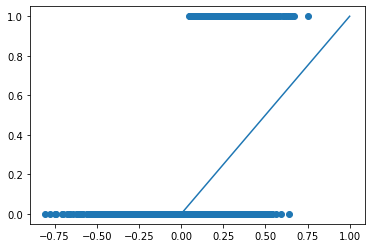

In [ ]:
pred_test = lr.predict (X_test)
plt.scatter (pred_test, y_test)
plt.plot ((y_test.min(), y_test.max()), (y_test.min(), y_test.max()))

In [ ]:
#visblement le modele lineair n'est pas approprie et il faidrait un modele en S, comme une regression logistique

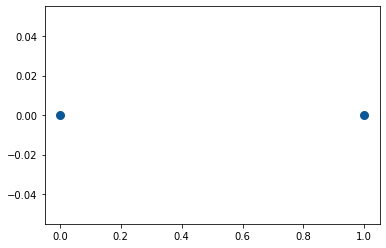

In [ ]:
pred_train = lr.predict (X_train)
residus = pred_train - y_train
plt.scatter ((y_train.min(), y_train.max()), (0,0), lw=3, color= '#0a5798')

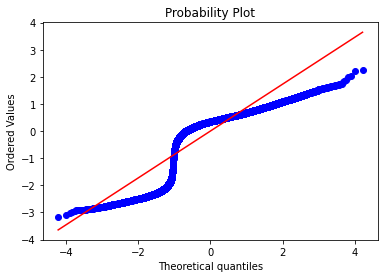

In [ ]:
# Diagramme de Quantile-Quantile pour evaluer la pertinence de l'ajustement de la distribution donnee a un modele theorique
residus_norm = (residus - residus.mean())/residus.std()
stats.probplot (residus_norm, plot=plt)
plt.show();

Concl : Ce 1er modele de regression logistique multiple n'est pas concluant car les points s'eloigne bcp de la droite 

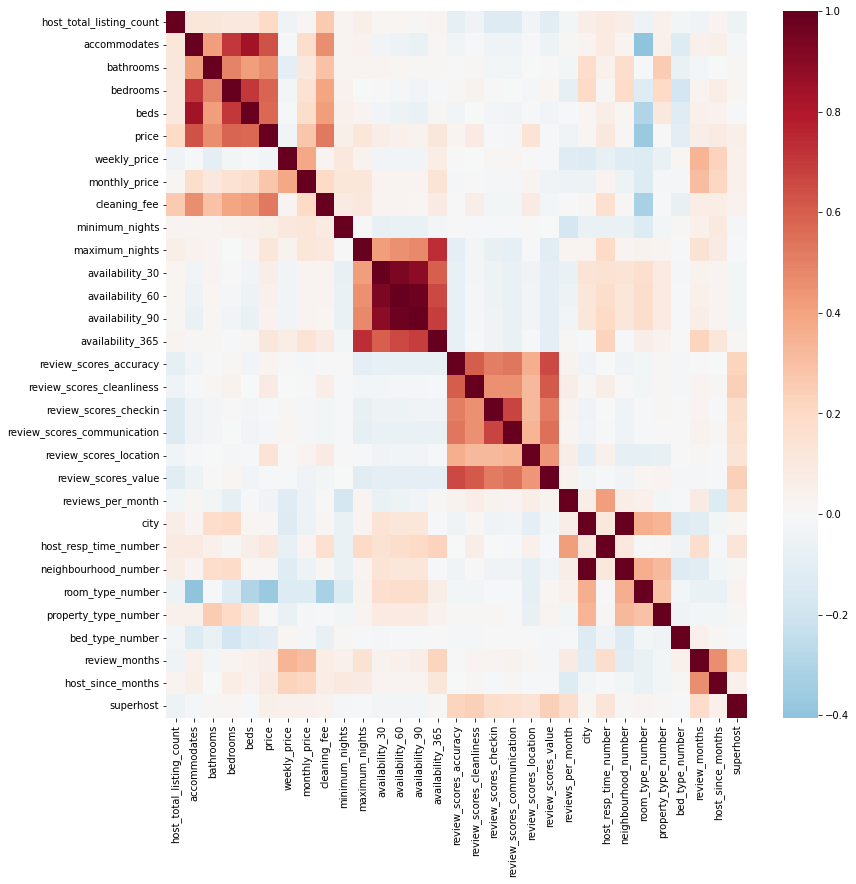

In [ ]:
#rajout de superhost dans data pour test la correlation des features avec la target
data ['superhost'] = target

plt.figure (figsize = (13,13))
sns.heatmap (data.corr(), annot = False, cmap = "RdBu_r", center = 0)

In [ ]:
# prenons les features les + corellees avec superhost pour regarder si l'on peut valider une hypothese de linearite avec un pairplot

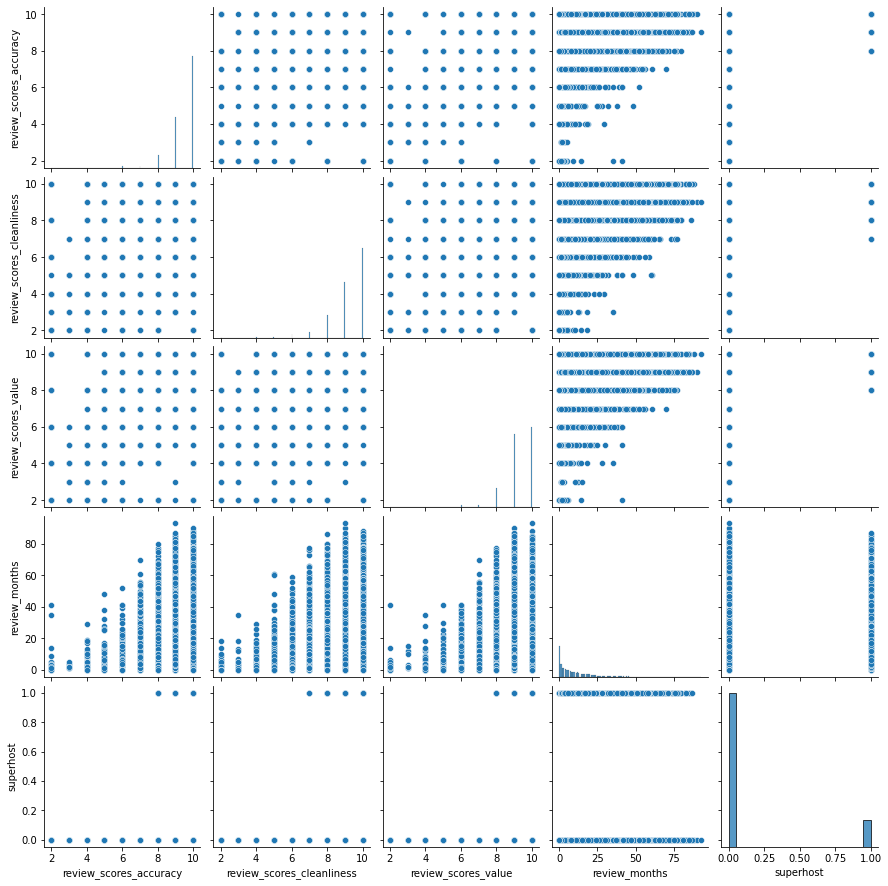

In [ ]:
sns.pairplot (data [['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_value', 'review_months', 'superhost']])

In [ ]:
# Bon cela ne convient pas ... Fail fast ! passons a un modele d'arbres de decisions  

**Classification par Regression logistique**

In [ ]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
# Creation d'une instance de Regression Logistique et Entrainement du classifier
clf = linear_model.LogisticRegression(C = 1.0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

# Calcul de la matrice de confusion 
## Méthode 1 : à l'aide de sklearn

from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas

print (pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'], normalize=True)

[[11707    28]
 [ 2018    22]]
Classe prédite      0   1
Classe réelle            
0               11707  28
1                2018  22


Classe prédite,0,1
Classe réelle,,
0,0.849873,0.002033
1,0.146497,0.001597


In [ ]:
#taux de predictions du modele
clf.score(X_test, y_test)

0.851470054446461

In [ ]:
#Rapport de classification des prediction en Regression Logistique
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     11735
           1       0.44      0.01      0.02      2040

    accuracy                           0.85     13775
   macro avg       0.65      0.50      0.47     13775
weighted avg       0.79      0.85      0.79     13775



In [ ]:
#Test d'un nouveau vecteur qui vaut 1 si la proba d'apartenir a Superhost est >0,6
probs = clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.6,1,0)

print (pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite']))
pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'], normalize=True)

Classe prédite      0  1
Classe réelle           
0               11731  4
1                2037  3


Classe prédite,0,1
Classe réelle,,
0,0.851615,0.000290
1,0.147877,0.000218


In [ ]:
#Rapport de classification des predictions en Regression Logistique
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     11735
           1       0.43      0.00      0.00      2040

    accuracy                           0.85     13775
   macro avg       0.64      0.50      0.46     13775
weighted avg       0.79      0.85      0.78     13775



In [ ]:
# CONCLUSION: Le fait de passer a un seuil de 60% joue bcp sur la Precision (37 a 50%). 
# Les resultats de Precision, 50% sont meilleurs que l'aleatoire (15%) mais pas top.

# Le Recall fait peur ... 1 a 2%, ce qui montre qu'on rate enormement de Superhost 
# La classification par Regression Logistique ne semble pas adapté pour des dataset heterogenes

In [ ]:
#Calcul de la courbe de ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

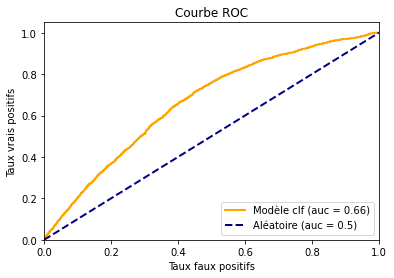

In [ ]:
#Display de la courbe de ROC
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# CONCLUSION
# La courbe de ROC nous montre que pour aller chercher 50% des SuperHosts, on a besoin de 30% des annonces (au lieu de 50% en mode pure aleatoire)
# Resultats pas foufou, mais deja ca !


Modele en Arbres de decisions

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Création d'une instance DecisionTreeClassifier et Entrainement du classifier.

# Partons avec un max de 4 niveaux 
dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth=10, random_state= 123)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
# Appliquons le modele aux donnees pour creer les predictions
y_pred = dt_clf.predict(X_test)

print (pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'], normalize= True)

Classe prédite      0     1
Classe réelle              
0               11170   582
1                 744  1279


Classe prédite,0,1
Classe réelle,,
0,0.810889,0.042250
1,0.054011,0.092849


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11752
           1       0.69      0.63      0.66      2023

    accuracy                           0.90     13775
   macro avg       0.81      0.79      0.80     13775
weighted avg       0.90      0.90      0.90     13775



In [ ]:
#Conclusion, dans une optique de recherche des Superhosts, le decision tree parait bien meilleur avec precision de 0.69 pour le superhost 
# et un recall qui ne s'effondre pas 0.62 (vs 1% en regression logistique) 


In [ ]:
#recherche des 15 variables les + influentes
feats = {}
for feature, importance in zip(data.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending = False ).head(15)

,Importance
review_months,0.302862
review_scores_accuracy,0.216125
reviews_per_month,0.206561
review_scores_value,0.093598
review_scores_cleanliness,0.072065
price,0.010400
host_since_months,0.010316
review_scores_checkin,0.008836
host_response_time_nr,0.006617
maximum_nights,0.005962


In [ ]:
# Recalculons le modele avec le calcul du Gini 
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=10, random_state=321)
dt_clf_gini.fit(X_train, y_train)
y_pred = dt_clf_gini.predict(X_test)
print (pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'], normalize=True)

Classe prédite      0     1
Classe réelle              
0               11178   574
1                 758  1265


Classe prédite,0,1
Classe réelle,,
0,0.811470,0.041670
1,0.055027,0.091833


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11752
           1       0.69      0.63      0.66      2023

    accuracy                           0.90     13775
   macro avg       0.81      0.79      0.80     13775
weighted avg       0.90      0.90      0.90     13775



In [ ]:
# Conclusion: le modele est meilleur au regard de la precision de 70% pour 0 (vs 15% en aleatoire) et 94% pour 1 pour la pred du SuperHost

In [ ]:
#recherche des 15 variables les + influentes
feats = {}
for feature, importance in zip(data.columns, dt_clf_gini.feature_importances_):
    feats[feature] = importance 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

importances.sort_values(by='Gini-importance', ascending = False ).head(15)

,Gini-importance
review_months,0.292313
reviews_per_month,0.249513
review_scores_accuracy,0.147678
review_scores_value,0.117512
review_scores_cleanliness,0.065323
price,0.013523
host_since_months,0.009976
review_scores_communication,0.009551
host_response_time_within a day,0.008280
review_scores_location,0.006685


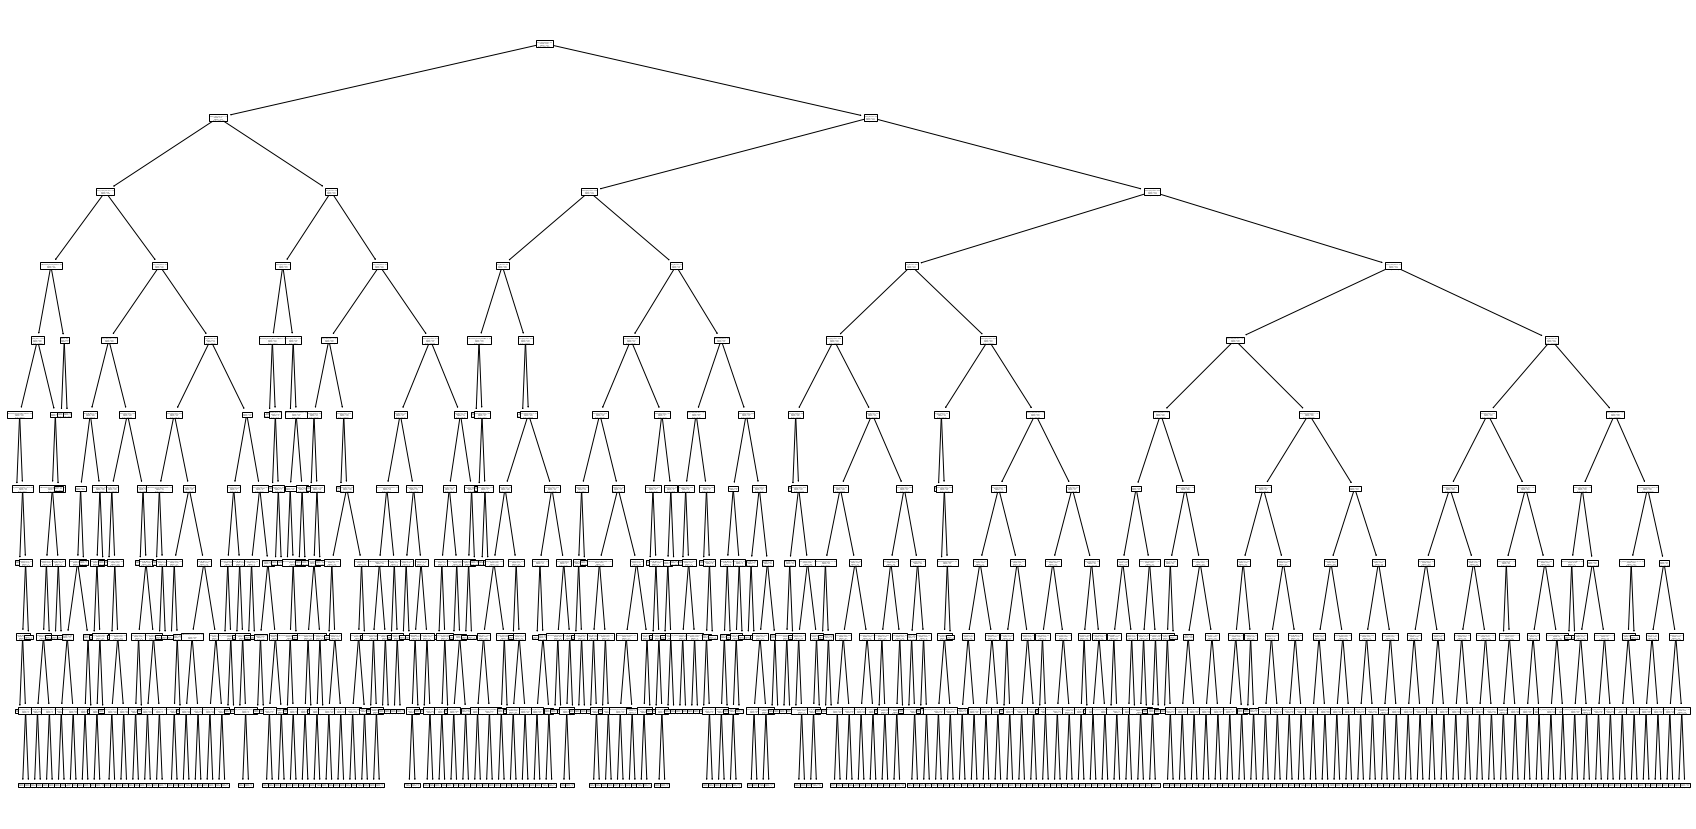

In [ ]:
from sklearn import tree
plt.figure(figsize = (30,15))
#tree.plot_tree(dt_clf);
tree.plot_tree (dt_clf, feature_names = X_train.columns.tolist() );


In [ ]:
data.columns

Index(['host_total_listing_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'host_response_time_a few days or more', 'host_response_time_nr',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour',
       'neighbourhood_cleansed_Barking and Dagenham',
       'neighbourhood_cleansed_Barnet',
       'neighbourhood_cleansed_Batignolles-Monceau',
       'neighbourhood_cleansed_Bexley', 'neighbourhood_cleansed_Bourse',
       'neighbourhood_cleansed_Brent', 'neighbourhood_cleansed_Bromley',
       'neighbourhood_

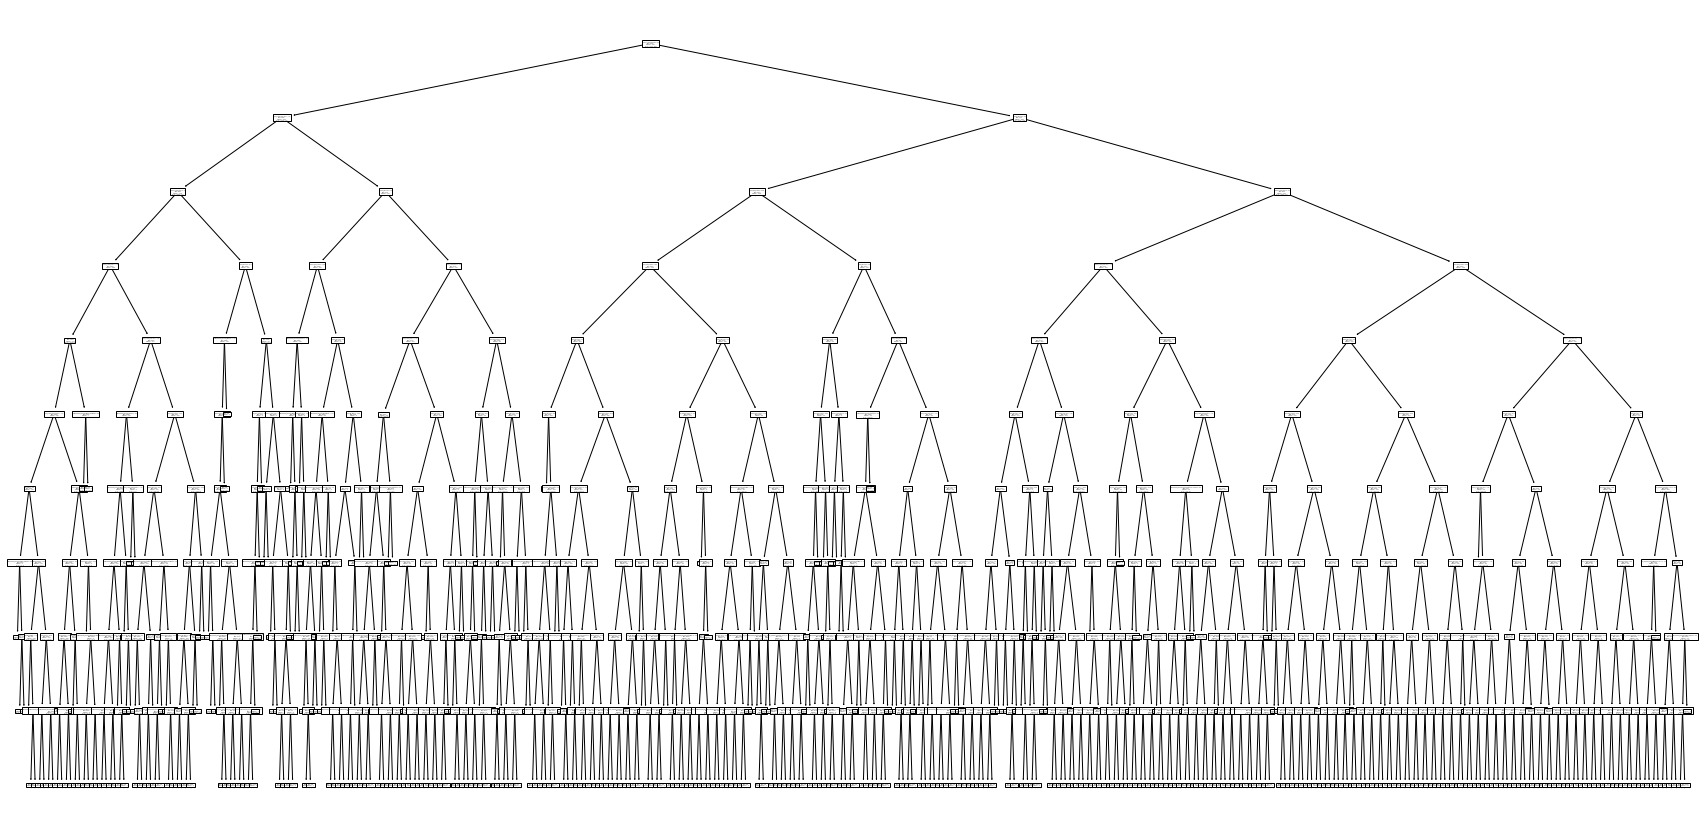

In [ ]:
plt.figure(figsize = (30,15))
tree.plot_tree (dt_clf_gini, feature_names = X_train.columns.tolist() );
#plot_tree(tree_clf, feature_names = X_train.columns.tolist(), filled=True);

In [ ]:
#Calcul de la courbe de ROC pour le decision GINI
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, y_pred, pos_label=1)

roc_auc = auc(fpr, tpr)

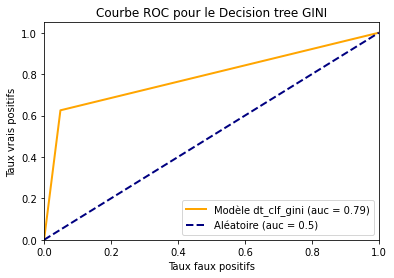

In [ ]:
#Display de la courbe de ROC pour Decision Tree GINI
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle dt_clf_gini (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC pour le Decision tree GINI')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# CONCLUSION
# La courbe de ROC montre un AUC de 0,79 bien honorable 
# Resultat BIEN MEILLEUR

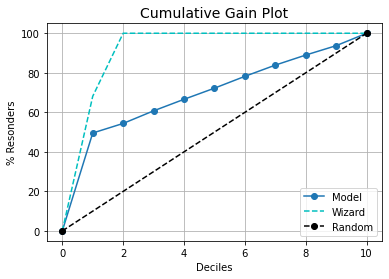

In [ ]:
# Courbe de Lift 
# !pip install kds
import kds
kds.metrics.plot_cumulative_gain(y_test, y_pred)


K plus proche voisin

In [ ]:
score = []


for k in range(1, 100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test)) 

#on affiche les scores
print(score)

[0.7606533575317604, 0.8316515426497277, 0.8071869328493648, 0.8349909255898367, 0.8235208711433757, 0.8377495462794918, 0.8302722323049002, 0.839491833030853, 0.8356442831215971, 0.8399274047186933, 0.836442831215971, 0.8415970961887478, 0.8395644283121597, 0.8417422867513612, 0.841016333938294, 0.8435571687840291, 0.8422504537205082, 0.8442831215970962, 0.8433393829401089, 0.844573502722323, 0.8446460980036298, 0.8442831215970962, 0.8442105263157895, 0.8449364791288566, 0.8447912885662432, 0.8451542649727768, 0.8451542649727768, 0.84486388384755, 0.8452994555353902, 0.8455172413793104, 0.8455172413793104, 0.8452268602540834, 0.8451542649727768, 0.8452268602540834, 0.8451542649727768, 0.8454446460980036, 0.8452994555353902, 0.845589836660617, 0.845589836660617, 0.845589836660617, 0.8455172413793104, 0.845589836660617, 0.845589836660617, 0.8455172413793104, 0.8457350272232305, 0.8454446460980036, 0.8456624319419238, 0.8454446460980036, 0.845589836660617, 0.8454446460980036, 0.845444646

In [ ]:
#Création du classificateur et entraînement du modèle
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_m.fit(X_train, y_train)

#On applique le modèle aux données de l'ensemble de test et stocker les prédictions obtenues dans la variable y_pred.
y_pred = knn.predict(X_test)

#On affiche une matrice de confusion pour comparer les classes réelles et prédites.
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0
Classe réelle,
0,11645
1,2130


In [ ]:
#Score du modèle 
score = knn_m.score(X_test, y_test)
score

0.8235208711433757

In [ ]:
y_train.value_counts()

0    47049
1     8048
Name: superhost, dtype: int64

In [ ]:
y_test.value_counts()

0    11645
1     2130
Name: superhost, dtype: int64

SVM

In [ ]:
#on ajuste X_train
#scaler = preprocessing.StandardScaler().fit(X_train)

#X_train_scaled = scaler.transform(X_train)
#on applique la meme transformation à X_test
#X_test_scaled = scaler.transform(X_test)


#On crée un classifieur clf
#clf = svm.SVC(gamma=0.01,  kernel='rbf')

#On entraine l'algorithme sur l'ensemble d'entraînement (X_train_scaled et y_train).
#clf.fit(X_train_scaled, y_train)

#On crée un dictionnaire parametres contenant les valeurs possibles prises pour le paramètre
#parametres = {'C':[0.1,10,50,100], 'kernel':['rbf','linear']}  

#On applique la fonction model_selection.GridSearchCV() au modèle clf
#grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres)

#On entraîne grid_clf sur l'ensemble d'entraînement, (X_train_scaled, y_train) 
#ET on sauvegarde les résultats dans l'objet grille.

#grille = grid_clf.fit(X_train_scaled,y_train)

#on affiche toutes les combinaisons possibles d'hyperparamètres 
#et la performance moyenne du modèle associé par validation croisée.
#print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])

#on affiche la meilleur combinaison
#print('\n''le meilleur paramètre est:',(grid_clf.best_params_))

In [ ]:
#Prédiction des features test et création de la matrice de confusion
#y_pred = grid_clf.predict(X_test_scaled)
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#Les resultats obtenu sont meilleurs 

Random forest

In [ ]:
# Création du classificateur et construction du modèle sur les données d'entraînement
clf_rf = ensemble.RandomForestClassifier() 

#On entraine l'algorithme sur l'ensemble d'entraînement (X_train_scaled et y_train).
clf_rf.fit(X_train_scaled, y_train)

#On crée un dictionnaire parametres contenant les valeurs possibles prises pour le paramètre
params_rf=[{'min_samples_split': [(i) for i in range (1,100,1)], 
                 'max_features': ['sqrt', 'log2']}]

#On applique la fonction model_selection.GridSearchCV() au modèle clf
grid_clf_rf = model_selection.GridSearchCV(estimator=clf_rf, param_grid=params_rf)

#On entraîne grid_clf sur l'ensemble d'entraînement, (X_train_scaled, y_train) 
#ET on sauvegarde les résultats dans l'objet grille.

grille_rf = grid_clf_rf.fit(X_train_scaled,y_train)

#on affiche toutes les combinaisons possibles d'hyperparamètres 
#et la performance moyenne du modèle associé par validation croisée.
print(pd.DataFrame.from_dict(grille_rf.cv_results_).loc[:,['params', 'mean_test_score']])

#on affiche la meilleur combinaison
print('\n''le meilleur paramètre est:',(grid_clf_rf.best_params_))

                                                params  mean_test_score
0     {'max_features': 'sqrt', 'min_samples_split': 1}              NaN
1     {'max_features': 'sqrt', 'min_samples_split': 2}         0.903007
2     {'max_features': 'sqrt', 'min_samples_split': 3}         0.903098
3     {'max_features': 'sqrt', 'min_samples_split': 4}         0.903225
4     {'max_features': 'sqrt', 'min_samples_split': 5}         0.903280
..                                                 ...              ...
193  {'max_features': 'log2', 'min_samples_split': 95}         0.891355
194  {'max_features': 'log2', 'min_samples_split': 96}         0.890520
195  {'max_features': 'log2', 'min_samples_split': 97}         0.891591
196  {'max_features': 'log2', 'min_samples_split': 98}         0.891900
197  {'max_features': 'log2', 'min_samples_split': 99}         0.890593

[198 rows x 2 columns]

le meilleur paramètre est: {'max_features': 'sqrt', 'min_samples_split': 10}


In [ ]:
#Prédiction des features test et création de la matrice de confusion
X_test_scaled = preprocessing.scale(X_test)
y_pred = grid_clf_rf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,11482,270
1,1029,994


In [ ]:
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'], normalize = True)

Classe prédite,0,1
Classe réelle,,
0,0.833539,0.019601
1,0.074701,0.072160


In [ ]:
#on affiche le score obtenu avec ce modèle
print("score:",grid_clf_rf.score(X_test_scaled,y_test))


score: 0.9056987295825771


In [ ]:
#Les resultats sont meilleurs 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11752
           1       0.79      0.49      0.60      2023

    accuracy                           0.91     13775
   macro avg       0.85      0.73      0.78     13775
weighted avg       0.90      0.91      0.90     13775



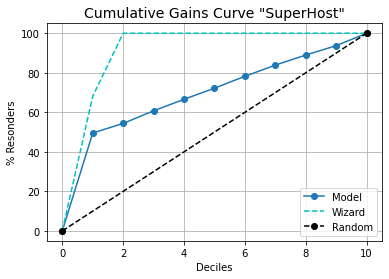

In [ ]:
# Courbe de Lift qui sera utiliser pour le PowerPoint final
!pip install kds
import kds
kds.metrics.plot_cumulative_gain(y_test, y_pred, title = 'Cumulative Gains Curve "SuperHost"')


In [ ]:
#recherche des 15 variables les + influentes
feats = {}
for feature, importance in zip(data.columns, grid_clf_rf.best_estimator_.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending = False ).head(15)

,Importance
review_months,0.159653
reviews_per_month,0.137135
review_scores_value,0.074282
review_scores_cleanliness,0.063784
review_scores_accuracy,0.050185
host_since_months,0.036964
price,0.036886
availability_365,0.032350
maximum_nights,0.030583
availability_90,0.026415
